In [36]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

dataset = pd.read_excel('final_dataset.xlsx')


In [37]:
dataset

,Stock Family,Stock Category New,Stock Category,Target Type,PW Location Level 0,PW Location Level 1,Volume_MBD_Target,Transit Type,Terminal Type,Refinery Area Desc,PW Source System,Refinery Area,Volume_MBD_Actual,Year,Month,Variance
0,CRUDE,CRUDE,CRUDE,Defined,US WEST COAST,EL SEGUNDO SUPPLY AREA,2345.00,InTank,Refinery,El Segundo,PW1,ELSE1,2162.75,2021,Jun,7.771855
1,CRUDE,CRUDE,CRUDE,Defined,US EAST,PASADENA SUPPLY AREA,745.00,InTank,Refinery,Pasadena,PW2,PASA,1325.86,2021,Jun,-77.967785
2,CRUDE,CRUDE,CRUDE,Defined,US EAST,PASCAGOULA SUPPLY AREA,2186.00,InTank,Refinery,Pascagoula,PW2,PASC,1920.00,2021,Jun,12.168344
3,CRUDE,CRUDE,CRUDE,Defined,US WEST COAST,RICHMOND SUPPLY AREA,1780.00,InTank,Refinery,Richmond,PW1,RICH,2162.69,2021,Jun,-21.499438
4,CRUDE,CRUDE,CRUDE,Defined,SALT LAKE OPT AREA,SALT LAKE REFINERY,260.00,InTank,Refinery,Salt Lake,PW6,SLAK,322.85,2021,Jun,-24.173077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,PRODUCTS,GASOLINE,MOGAS,Calculated,US EAST,PASADENA SUPPLY AREA,4.23,InTank,Terminal,Pascagoula,PW2,PASC,4.45,2024,Apr,-5.200946
26964,PRODUCTS,GASOLINE,MOGAS,Calculated,US WEST COAST,EL SEGUNDO SUPPLY AREA,107.85,InTransit,InTransit,El Segundo,PW1,ELSE1,27.66,2024,Apr,74.353268
26965,PRODUCTS,GASOLINE,MOGAS,Calculated,US EAST,PASADENA SUPPLY AREA,2.20,InTransit,InTransit,Pascagoula,PW2,PASC,2.04,2024,Apr,7.272727
26966,PRODUCTS,GASOLINE,MOGAS,Calculated,US EAST,LATAM SYSTEM,8.48,InTransit,InTransit,CCA,PW2,CO00,11.72,2024,Apr,-38.207547


In [53]:
unique_values = dataset.nunique()
print(unique_values)

Stock Family               4
Stock Category New         9
Stock Category            42
Target Type                2
PW Location Level 0        3
PW Location Level 1       10
Volume_MBD_Target        620
Transit Type               2
Terminal Type              3
Refinery Area Desc         6
PW Source System           3
Refinery Area             13
Volume_MBD_Actual       8750
Year                       4
Month                     12
Variance               19067
dtype: int64


In [68]:
# perform one-hot encoding on the 'color' column
#one_hot_ = pd.get_dummies(X_array['Stock Family'], prefix='Stock Family')
one_hot = pd.get_dummies(dataset, columns=['Stock Family','Stock Category New','Stock Category',
                                            'Target Type','PW Location Level 0','PW Location Level 1',
                                            'Transit Type','Terminal Type','Refinery Area Desc','PW Source System',
                                            'Refinery Area','Year','Month'], 
                                            prefix = ['Stock Family','Stock Category New','Stock Category','Target Type',
                                                      'PW Location Level 0','PW Location Level 1','Transit Type',
                                                      'Terminal Type','Refinery Area Desc','PW Source System',
                                                      'Refinery Area','Year','Month'],drop_first=True, dtype=int)
# concatenate the one-hot encoding with the original dataframe
one_hot = one_hot.drop(['Volume_MBD_Target','Volume_MBD_Actual','Variance'], axis= 1)
df1 = pd.concat([dataset, one_hot], axis=1)
# drop the original 'color' column
df1 = df1.drop(['Stock Family','Stock Category New','Stock Category','Target Type','PW Location Level 0','PW Location Level 1','Transit Type','Terminal Type','Refinery Area Desc','PW Source System','Refinery Area','Year','Month'], axis=1)

In [69]:
df1

,Volume_MBD_Target,Volume_MBD_Actual,Variance,Stock Family_INTERMEDIATES,Stock Family_OTHER,Stock Family_PRODUCTS,Stock Category New_CYCLE OIL,Stock Category New_DISTILLATE,Stock Category New_DISTILLATE FEEDSTOCKS,Stock Category New_FUEL OIL FEEDSTOCKS,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,2345.00,2162.75,7.771855,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,745.00,1325.86,-77.967785,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2186.00,1920.00,12.168344,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1780.00,2162.69,-21.499438,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,260.00,322.85,-24.173077,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,4.23,4.45,-5.200946,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26964,107.85,27.66,74.353268,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26965,2.20,2.04,7.272727,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26966,8.48,11.72,-38.207547,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X_array = df1.drop(['Volume_MBD_Actual','Variance'], axis= 1)
y_array= df1[['Volume_MBD_Actual']]
X = X_array.iloc[:].values
y = y_array.iloc[:].values
print(X)

[[2.345e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [7.450e+02 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.186e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.200e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.480e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.079e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  1.34   0.32]
 [ 25.63  17.37]
 [ 23.16   8.36]
 ...
 [ 19.92   7.75]
 [ 92.62  71.52]
 [-29.65   0.  ]]


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc, html
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from dash.dependencies import Input, Output
import plotly.subplots as sp
import plotly.figure_factory as ff
import seaborn as sns
import scipy.stats as stats
from scipy.stats import probplot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [79]:
results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    #results_df = results_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2':r2}, ignore_index=True)
    results_df = pd.concat([results_df, pd.DataFrame([{'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2':r2}])], ignore_index=True)
print(results_df)

C:\Users\10710602\AppData\Local\Temp\ipykernel_26616\1937025572.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2':r2}])], ignore_index=True)
C:\Users\10710602\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\10710602\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

                       Model           MSE        MAE        R2
0           LinearRegression   5587.951151  25.164449  0.802978
1                      Ridge   5611.811528  25.151385  0.802137
2                      Lasso   6803.518085  24.139008  0.760119
3                 ElasticNet   6992.235155  23.757027  0.753465
4        KNeighborsRegressor   3975.074498  16.726885  0.859845
5      DecisionTreeRegressor   4731.850594  20.726107  0.833163
6      RandomForestRegressor   4173.942670  17.434039  0.852834
7  GradientBoostingRegressor   4118.906015  19.210116  0.854774
8                        SVR  18429.274944  26.292195  0.350214


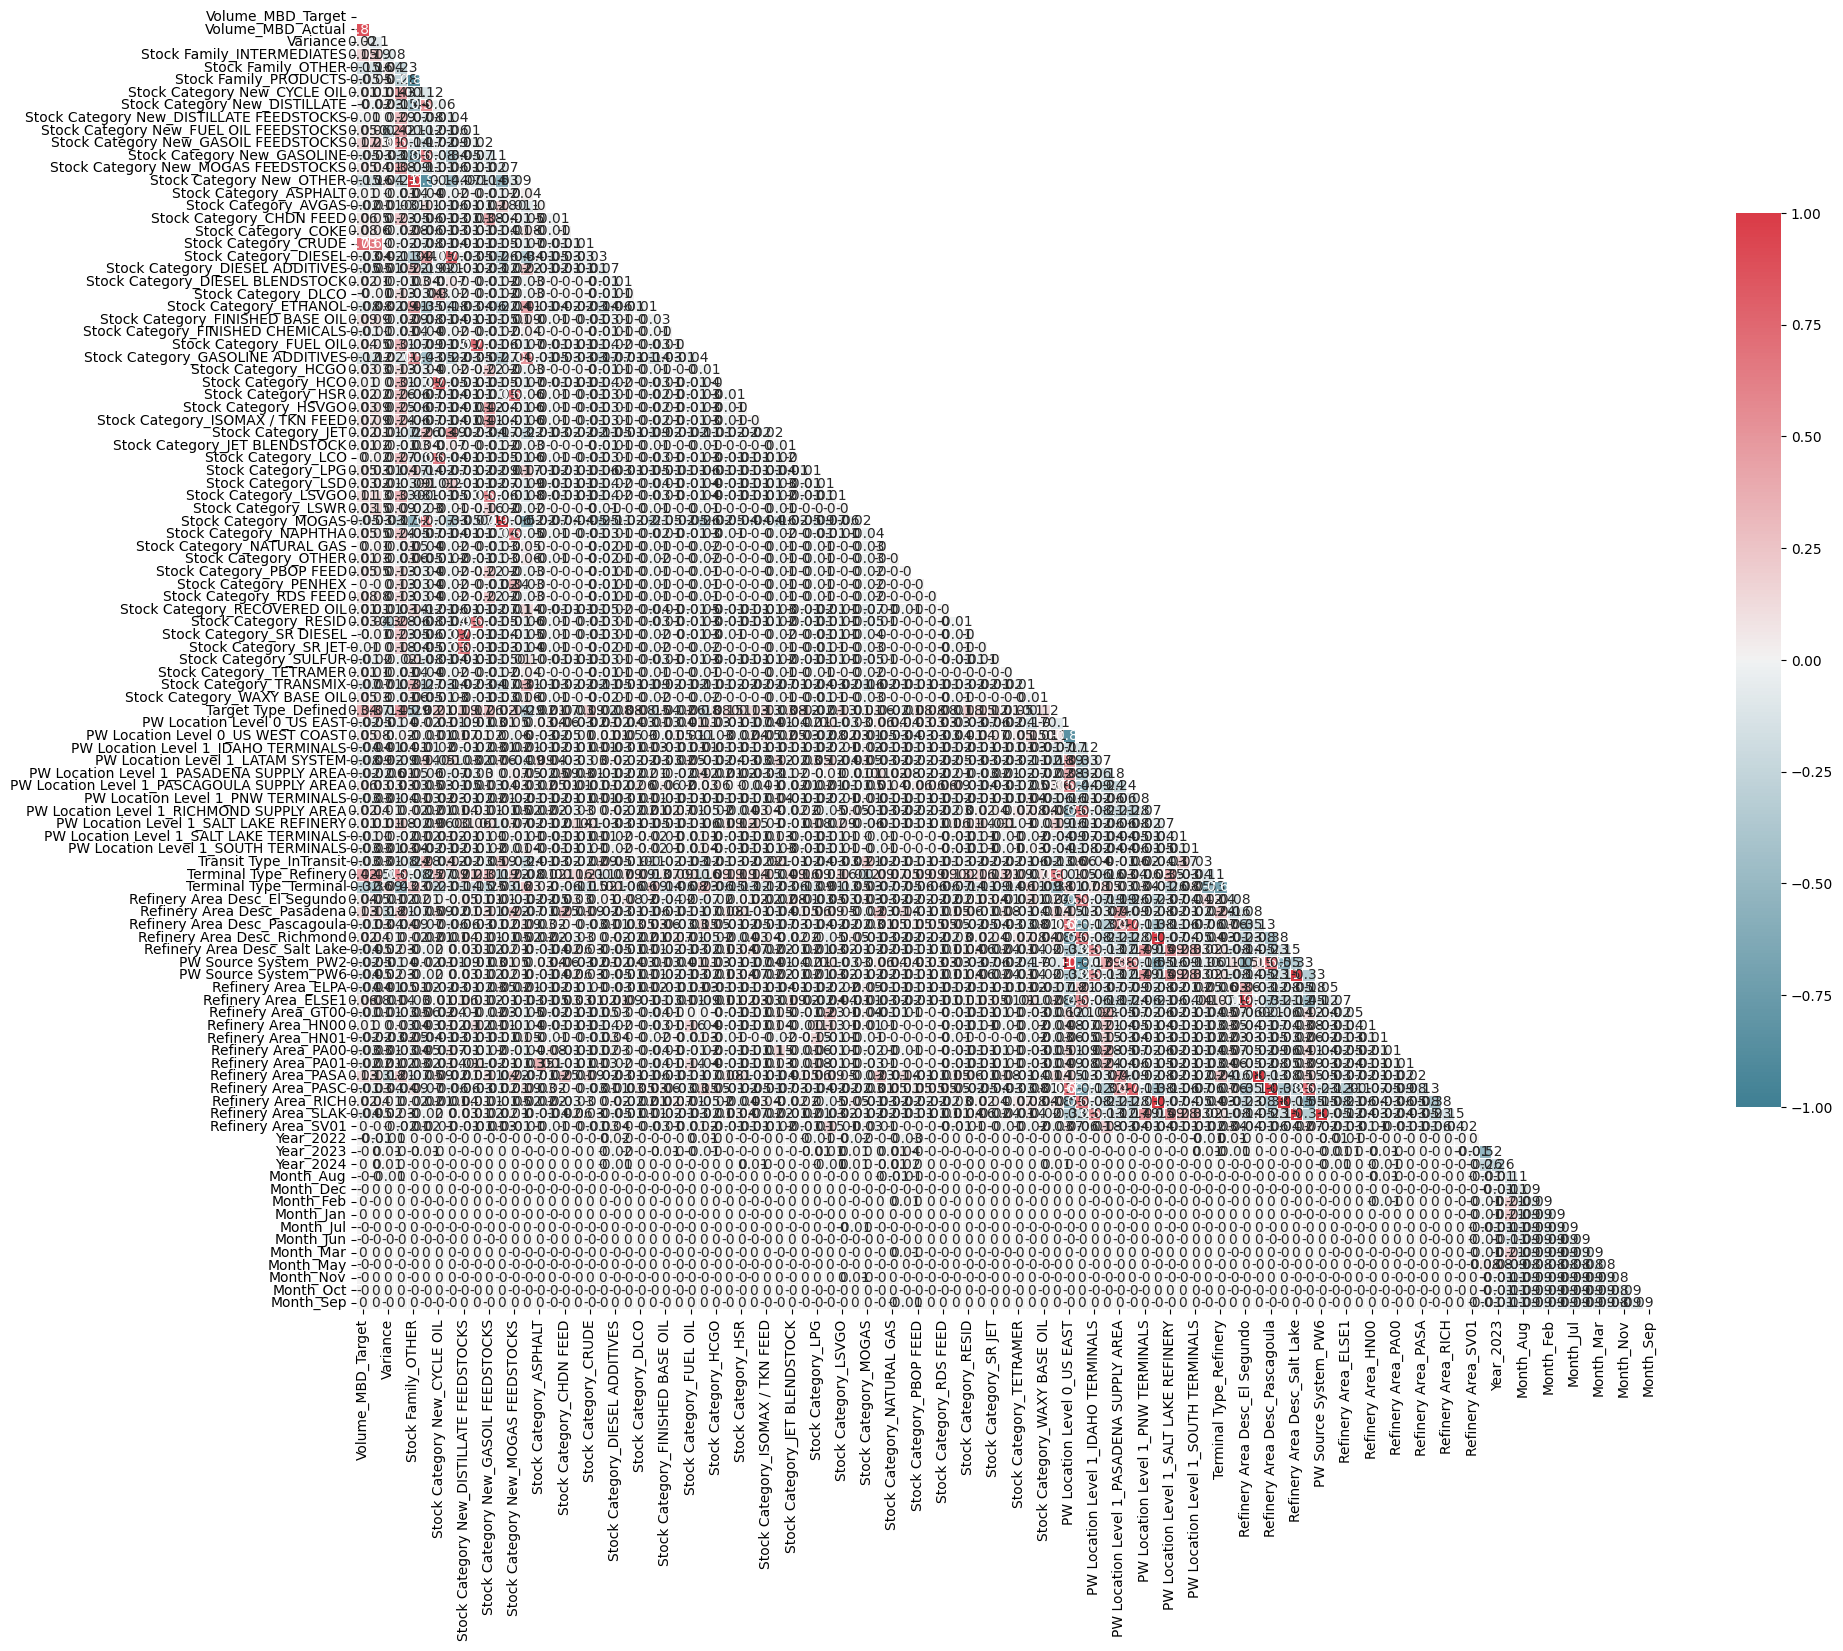

In [83]:
 #Generate and visualize the correlation matrix
corr = df1.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [93]:
from sklearn.neighbors import KNeighborsRegressor

neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i]=knn.score(X_train, y_train)
    
    test_accuracy[i]=knn.score(X_test, y_test)

In [94]:
knn = KNeighborsRegressor()

# Define the parameter grid for the grid search
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8, 9,10, 11,12, 13],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)

# Print the best score found by the grid search
print("Best score: ", -grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_knn = grid_search.best_estimator_
predictions = best_knn.predict(X_test)

Best parameters:  {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best score:  3791.1198604241245


In [99]:
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(rmse)
print(r2)

3916.278829061517
62.580179202855575
0.8619183332610275


In [105]:
result = pd.DataFrame((np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))
result.to_csv('result.csv')

C:\Users\10710602\AppData\Local\Temp\ipykernel_26616\3303427093.py:1: RuntimeWarning: overflow encountered in expm1
  y_pred_original = np.expm1(y_pred)


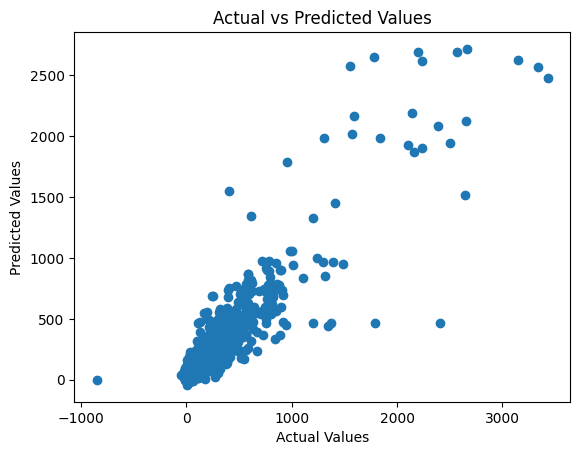

In [106]:
y_pred_original = np.expm1(y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [107]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 6 ,8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

C:\Users\10710602\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\10710602\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\10710602\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\10710602\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y wa